> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 15: Text as Data 1

*Morning, August 22, 2018*

In this Exercise Set you will implement a sklearn classifier to do Sentiment Analysis using the labeled review data that you collected in exercise set 8. You will also practice your basic python skills while implementing the tf-idf weighing scheme. 

# Exercise Section 15.1: Writing your own TFIDF vectorizer

In this exercise you will practice your python skills while implementing the [Term Frequency - Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) scheme.
> **Ex. 15.1.0:** First we load the data: using the `pd.read_csv` function. link to the data is here: 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv 

> Next we define a variable `tokenized` to be transformed using our TF-IDF vectorizer, by tokenizing a the text column (reviewBody) in the dataframe using the `nltk.word_tokenize` function. 


In [ ]:
#[Answer 15.1.0]

In [2]:
# SOLUTION
import nltk
nltk.download('punkt')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')
import re
token_re = re.compile('\w+')
tokenized = df.reviewBody.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /home/kristian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Now we are to define a our tfidf transformation of the tokenized texts. 
Remember that:
$ IDF = \log\frac{N}{n_t} $

$ TF = \frac{c_{t_i,d}}{d_c} $

where 

$N$ is the number of documents.

$n_t$ is the number of documents with the token present

$c_{t,d}$ is the is the number of times a token t is present in d

$c_d$ is the number of tokens in document

We need to do the following steps:
1. For each word count the number of Document it is present in.
2. Transform this document count into inverse document frequency. 
3. Calculate the term frequncy in each document.
4. Finally we weight the term frequency in each document with the inverse document frequency of each term.
5. We return this as a sparse vector. 

> **Ex. 15.1.1:** 
Import the Counter object from the builtin package collections (Hint1). This is essentially a dictionary designed for keeping counts, same syntax, but extra functionality. We don't have to initialize each key. We can write: 

```python
c = Counter()
# then we can do this
c['hej']+=1
# without first defining c['hej'] = 0
```


>* Initialize a Counter object and assign it to the variable `dc` (document count).
>* Define a list named `text_counts`. In this container we will store each document after we have converted it to counts of tokens.
>* Run through all tokenized texts and
    * initialize a Counter object with the tokenized text as input, assign this object to a variable `c_t`. >This will now contain a count of each token in the document. Append `c_t` to our list `text_counts`.
    * run though each key in the `c_t` and increment the document count variable `dc` by one. (Hint2)

(hint1: from ... import ...)

(hint2: dc[token]+=1)

In [69]:
#[Answer goes here]

# This will be in assignment 2 

> **Ex. 15.1.2:** 
Now we define the the inverse document frequency variable `idf` as a dictionary with the tokens as keys and idf weights as values. We do this by running through both the token and the value (document count) in the `dc` variable and calculate the ratio between number documents and the token document counts. 

>Use the `np.log` function for the log transform.

>We can iterate through this using the `.items()` syntax we know from the dictionary. 


In [ ]:
#[Answer 15.1.2]

# This will be in assignment 2

> **Ex. 15.1.3:** 
Now we weight the term frequency in each document with the idf value of each token. Here we used our `text_counts` variable that almost holds the frequency, we just need to divide by the number of tokens in the document. 
Define a list container: `tfidf_docs`. 

FIRST LOOP: For each counter in the text_count container:
    * define the variable `doc_n` as sum of all values in the counter - `.values()` .
    * define a dictionary named `tfidf`.
    * SECOND LOOP: run through all tokens, and their counts by using the `.items()` method of the counter.
        * define a value tf as the ratio between the count and the sum.
        * now weight this value with the idf weight found by calling the idf variable with the token as key.
        * assign this weighed term frequency to the tfidf[token].
    * Once outside the second loop. Append the tfidf dictionary to the tfidf_docs list container.

In [74]:
#[Answer 15.1.3]

# This will be in assignment 2

> **Ex. 15.1.extra:** 
Convert the dictionary to a sparse matrix.
* Create a index for each token that you can look up using a dictionary. 
* define the shape of the matrix i.e. n_rows and n_cols, as a tuple containing the number of documents and number of tokens.
* import scipy.sparse as sp. And initialize a sparse matrix you can build incrementally: sp.lil_matrix(). 
    * It takes the shape parameter. And a datatype `dtype` parameter, define the dtype as np.float32. 
* Iterate through the transformed documents from the `tfidf_docs` variable. Add the enumerate() function to keep of track of the row numbers. 
    * SECOND LOOP: iterate through all token, and tfidfscore. Get the index of the token and assign the score to the matrix using doc_idx and token_idx as selectors. i.e. mat[doc_idx,token_idx] = score
        

In [6]:
import scipy.sparse as sp
# define index of each token
token2idx = {key:num for num,(key,count) in enumerate(dc.most_common(len(dc)))}
n_tokens = len(token2idx)
shape = (n_docs,n_tokens) # define the shape of the matrix as n_docs and n_tokens
mat = sp.lil_matrix(shape,dtype=np.float32) # initialize the sparse matrix that can be build.

for num,tfidf in enumerate(tfidf_docs): # iterate through documents, while keeping index using enumerate
    for token,score in tfidf.items(): # iterate through token and tfidf score
        idx = token2idx[token] # get index of the token by calling the token2index dictionary.
        mat[num,idx] = score  # assign the value in the matrix, [row, col]  = [doc_idx,token_idx]

mat = mat.tocsr() # convert to csr sparse matrix format


## Exercise Section 15.2: Supervised Sentiment Analysis


In this exercise I want you to train a classifier to do sentiment analysis of text. You will use the ratings as labels and the reviews as features. You will go through all steps, from preprocessing, feature engineering, cleaning and tokenization, to vectorization and training of the classifier. Then you will wrap it all in a function to make the code reusable. 

And finally you will analyze the performance of the resulting classifier.
> **Ex. 15.1.0:** First we load the data: using the `pd.read_csv` function. link to the data is here: 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv 

In [1]:
# [Answer to Ex. 15.1.0]

In [7]:
# Solution
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')

### Feature engineering using regular expression.
Because we are essentially creating a model that trains on a bag of words representation of the data, we are not going to think too much about the tokenization scheme. However we want to make sure that emoticons and emojiis are being included as they carry vital information for sentiment analysis. Here we use the regular expression to capture emoticons we wrote in Exercise set 9 or write a new one. 

Furthermore we want to continue exercise 9.2 of capturing references to the cost of a service. We want to embed domain knowledge into the prices, convert it to a categorical variable, from low to high price, instead of the model being presented with unique tokens ($\$921$ $\$10$ $\$935$ ) that it cannot learn from. 

**Ex. 15.2.1:** 
Write a function to capture all digits before or after a dollar sign. But we only capture the digits. We then convert it to a float. And map this to a categorical value. We convert the digit using the following rules: 
* if below $\$10$: return '\__price0__'
* elif between $\$10$ and $\$100$: return '\_\_price1\__'
* elif between $\$100$ and $\$500$: return '\_\_price2\__'
* else: return '\__price3\__'

Instructions here:
>* First write a function `price2category`that takes a float or integer value and outputs a price category (e.g. 100000 = '\__price3__') according to the above rules.
* Compile your currency regular expression and assign it to the variable `currency_re`.
* Use the currency_re variable to find all (.findall) prices/currencies mentioned in a string. Assign this to a variable: `prices`
* define a simple a regular expression that extract only the digits from a string you already know is a price.
* Extract the digits from each price string in the `prices` variable, and assign them to a list named `digits`.
* Now we need to distinquish between ,. used to indicate fraction of a dollar, or to help us read large numbers. Here we use the following patterns that looks behind and ahead and counts how many digits. two digits after indicates fraction of a dollar, and 3 digits indicate helper.: 
```python 
helper_pattern = '(?<=\d)[.,](?=\d{3})' # help pattern 
cent_pattern = '(?<=\d)[,.](?=\d{2})' # cent pattern
```
* Use the cent_pattern to substitute all ,. with '.'. I.e. by applying re.sub(cent_pattern,digit_string) to all digits strings in the `digits` variable. 
* Do same thing with the helper_pattern but now substitute with an empty string ''. 
* Convert the now ready digit strings to float. Using the builtin function `float()`.
* Then convert all float values to pricecategories by applying the price2category function on all the values. 
* Lastly iterate through the original matches in the string, stored in the `prices` variable, and the resulting pricecategories using a for loop where you zip the two variables: zip(prices,price_categories). 
    * For each price, pricecategory pair you overwrite the original string, with a string that has replaced the price with the pricecategory.

* Finally wrap it all in a function named `embed_price_categories` and remember to return the string. 

In [95]:
#[Anawer 15.2.1]

In [8]:
#Solution
import re
pattern = '[£$] ?[0-9]+(?:[.,][0-9]+)*|[0-9]+(?:[.,][0-9]+)* ?(?:USD|usd)|[0-9]+(?:[.,][0-9]+)* ?(?:dollars|DOLLARS)'
currency_re = re.compile(pattern)
def price2category(val): # define category mapping rule
    if val<10:
        return '__price0__'
    elif 10<=val<100:
        return '__price1__'
    elif 100<=val<500:
        return '__price2__'
    else:
        return '__price3__'

def embed_price_categories(string): # 
    prices = currency_re.findall(string) # 
    if len(prices)==0: # if no matches just return
        return string
    # extract digit
    digits = [re.findall('[0-9,.]+',price)[0] for price in prices] # extract the digits from the price
    ## Now we need to distinquish between ,. used to indicate fraction of a dollar,
    ## or to help us read large numbers.
    # erase ., for helping reading. 
    helper_pattern = '(?<=\d)[.,](?=\d{3})' # help pattern 
    cent_pattern = '(?<=\d)[,.](?=\d{2})' # cent pattern
    # substitute ,. variations of cents, with python '.'
    digits = [re.sub(cent_pattern,'.',digit) for digit in digits] 
    digits = [re.sub(helper_pattern,'',digit) for digit in digits]
    # convert to float
    digits = [float(digit) for digit in digits]
    price_categories = [price2category(digit) for digit in digits]
    for price_pattern,price_cat in zip(prices,price_categories):
        string = string.replace(price_pattern,price_cat)
    return string

string_examples = ['$1000.000.00 er nice','100.000,00 usd','$2','$20','120 USD']
for string in string_examples:
    print(string,embed_price_categories(string))

$1000.000.00 er nice __price3__ er nice
100.000,00 usd __price3__
$2 __price0__
$20 __price1__
120 USD __price2__


> **Ex. 15.2.2:** Normalization and tokenization
In this exercise we define a function for normalizing tokens. It should apply our feature engineering of prices, make sure emoticons are tokenized, lower string to noncapital letters.  

>* Define a function `normalize_tokens` taken a string as input. 
* First use the function for extracting prices and substituting for a price class.
* Because the standard tokenization scheme does not have a rule for emoticons we extract all emoticons before tokenization. Do this by using the following precompiled regular expression from the `nltk` package:
nltk.sentiment.util.EMOTICON_RE.findall() - compiled here means that you don't need to specify the pattern, since it is build in. You need to `import nltk.sentiment`.
* If emoticons are found, iterate through the emoticons found and remove them from the string using the builtin string method: `.replace`.
* Now write a list comprehension lowering all strings - i.e. capital to noncapital letters. Use the builtin string method: `.lower()`
* finally add the emoticons found to the token list. And return all tokens.


In [9]:
import nltk
import nltk.sentiment
def normalize_tokens(string):
    # extract prices and substitute for price classes.
    string = embed_price_categories(string)
    # extract emoticons.
    emoticons = nltk.sentiment.util.EMOTICON_RE.findall(string)
    # remove emoticons from string
    for emoticon in emoticons:
        string = string.replace(emoticon,'')
    # tokenize
    tokens = nltk.word_tokenize(string)
    # lower tokens
    tokens = [token.lower() for token in tokens]
    # add emoticons. Since it is a bag of words model, sequences does not matter.
    tokens+=emoticons
    return tokens
normalize_tokens('hej med dig giv mig $1000.000.00 og jeg elsker dig :)')

/home/kristian/miniconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


['hej',
 'med',
 'dig',
 'giv',
 'mig',
 '__price3__',
 'og',
 'jeg',
 'elsker',
 'dig',
 ':)']

> **Ex. 15.2.3** Now we are ready to convert our documents into Sparse Matrices to be used in training the classifier. But first we need to convert our ratings variable into a binary form and split the data into train and test. 
* apply function that return 0 if rating is 3 or below and 1 if rating is above. 
* Next we split our data into test and train, by indexing the first 7500 for traning and last 2500 for testing. 
* We use the sklearn version of the tfidf vectorizer. First import it (if you don't know how to, ask google). 
* Initialize the vectorizer with the arguments, preprocessor = None, tokenizer=normalize_tokens.
* Apply the `.fit` function to the training data only (to make sure no leakage from train to test will happen).
* apply the `.transform` function to both the training and the test data.

In [31]:
#[Answer 15.2.3]

In [11]:
# SOLUTION
from sklearn.model_selection import train_test_split
df['y'] = df['reviewRating_ratingValue'].apply(lambda x: 1 if x>3 else 0)
X_train,X_test = df['reviewBody'].values[0:7500],df['reviewBody'].values[7500:]
y_train,y_test = df['y'].values[0:7500],df['y'].values[7500:]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor=None,tokenizer=normalize_tokens)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

> **Ex. 15.2.4:** Training the model. 
Here we apply a logistic regression model with regularization to predict whether the rating is positive (above 3) or negative. 
* First we import the classifier: from sklearn.linear_model import LogisticRegression 
* Next we initialize it with regularization parameter C=10
* Then we use the .fit method.
* And finally we measure the performance: accuracy, precision, recall, f1 etc.

In [38]:
#[Answer 15.2.4]

In [12]:
# solution
from sklearn.linear_model import LogisticRegression
# initialize classifier with regularization parameter C=10
clf = LogisticRegression(C=10)
clf.fit(X_train,y_train) # fit classifier

## get metrics
import sklearn.metrics
score_functions = {}
for name, val in sklearn.metrics.__dict__.items(): # iterate through every module's attributes
    if callable(val):                      # check if callable (normally functions)
        if 'score' in name:
            #print(name,val.__code__.co_varnames[0:2])
            score_functions[name] = val

def score(clf,X_test,y_true,scores=False): # define scoring function.
    if hasattr(clf,'predict_proba'):
        score = clf.predict_proba(X_test)
    else:
        score = False
    pred = clf.predict(X_test)
    d = {}
    if scores==False:
        scores = score_functions
        
    for name,func in scores.items():
        arguments = set(func.__code__.co_varnames)
        if 'score_func' in arguments:
            y_pred = score
        elif 'labels_pred' in arguments:
            y_pred = pred
        elif 'y_pred' in arguments:
            y_pred = pred
        else:
            continue
        try:
            d[name] = func(y_true,y_pred)
        except:
            continue
        
    return d
score(clf,X_test,y_test) # score the classifier

{'accuracy_score': 0.9292,
 'f1_score': 0.9599638090929654,
 'jaccard_similarity_score': 0.9292,
 'precision_recall_fscore_support': (array([0.77906977, 0.94647636]),
  array([0.62616822, 0.97384121]),
  array([0.69430052, 0.95996381]),
  array([ 321, 2179])),
 'precision_score': 0.9464763603925067,
 'recall_score': 0.9738412115649381,
 'adjusted_mutual_info_score': 0.3691054758163867,
 'adjusted_rand_score': 0.5964371019839416,
 'completeness_score': 0.4264844483627536,
 'homogeneity_score': 0.3694363865350233,
 'mutual_info_score': 0.14161745949043064,
 'normalized_mutual_info_score': 0.3969368633882704,
 'fowlkes_mallows_score': 0.9175349536980019,
 'v_measure_score': 0.395915941908354,
 'explained_variance_score': 0.37304259434791753,
 'r2_score': 0.3673682088585608}

>**Ex. 15.2.5:**
Now run the classifier again + evaluation, but this time we do a multiclass prediction. This means changing the `y` variable to be the ratings.

* When doing the evaluation, we also want to see the confusion matrix to inspect the errors.

In [52]:
#[Answer 15.2.5]

{'accuracy_score': 0.7964,
 'jaccard_similarity_score': 0.7964,
 'precision_recall_fscore_support': (array([0.67153285, 0.23529412, 0.325     , 0.34351145, 0.8445977 ]),
  array([0.6618705 , 0.05882353, 0.11403509, 0.16304348, 0.96531792]),
  array([0.66666667, 0.09411765, 0.16883117, 0.22113022, 0.90093183]),
  array([ 139,   68,  114,  276, 1903])),
 'adjusted_mutual_info_score': 0.1997991907865905,
 'adjusted_rand_score': 0.4207723457137724,
 'completeness_score': 0.32282035868466696,
 'homogeneity_score': 0.20303924240277094,
 'mutual_info_score': 0.17268331274576962,
 'normalized_mutual_info_score': 0.25601797018866773,
 'fowlkes_mallows_score': 0.8149334043181007,
 'v_measure_score': 0.24928783623607154,
 'explained_variance_score': 0.429976684934141,
 'r2_score': 0.40182762146996365}

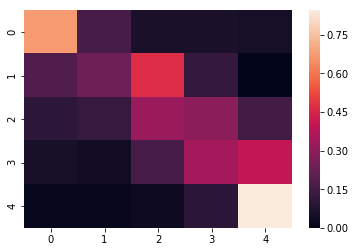

In [13]:
# Solution
y = df['reviewRating_ratingValue'].values
y_train,y_test = y[0:7500],y[7500:]
# initialize classifier with regularization parameter C=10
clf = LogisticRegression(C=10)
clf.fit(X_train,y_train) # fit classifier
# make confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(clf.predict(X_test),y_test)
# normalize the confusion matrix
normed_confusion = []
for row in confusion:
    normed_confusion.append(row/row.sum())
# plot it
import seaborn as sns
%matplotlib inline
sns.heatmap(normed_confusion)
# visualize it using seaborn heatmap.
score(clf,X_test,y_test) # score the classifier

##  Bias and Fairness
If we want to use our classifier as a measurement tool, for say measuring public sentiment. We need to understand the bias our classifier has so we can potentially correct it. 
In this you should Calculate performances on subpopulations of the data.

* We should look at how it is skewed towards one class or the other.
* We should look at if it does better under certain product categories.
* We should look at whether it does better when male or female authors. (by inferring gender matching the surname to data from the following register: (Female names: https://ast.dk/_namesdb/export/names?format=xls&gendermask=1, male names: https://ast.dk/_namesdb/export/names?format=xls&gendermask=2, unisex names: https://ast.dk/_namesdb/export/names?format=xls&gendermask=3).


In [51]:
#[Answer]

# extra
Design a regular expression that locates references to time (days, months, minutes hours) and do a similar categorization using domain knowledge, of what long time is.

In [14]:

string = ' '.join(df[df.reviewBody.apply(lambda x: 'wait' in x)].reviewBody.values) # get a meaningful sample.
import re
# solution
pattern = '\d+ (?:days|months|minutes|hours|weeks|year)'
